# Load libraries & helper functions

In [1]:
from helpers import *
%matplotlib inline

# Declare parameters

In [2]:
config.DATADIR      = '/home/duboisjx/mnt10/LabUsers/duboisjx/data/PreImplant/MRI'
# fMRI runs
config.fmriRun      = 'movie_1'

# use volume or surface data
config.isCifti      = False

config.overwrite    = False

config.pipelineName = 'Gordon1'
# use ICA-FIX input
config.useFIX       = False
config.preWhitening = False
config.Operations   = config.operationDict[config.pipelineName]

# submit jobs with sge
config.queue        = False
# make sure to set memory requirements according to data size
config.maxvmem      = '5G'

# parcellation for FC matrix
config.parcellationName = 'shen2013'
config.parcellationFile = '/home/duboisjx/mnt10/LabUsers/duboisjx/data/parcellations/shenetal_neuroimage2013_new/shen_2.5mm_268_parcellation.nii.gz'
config.nParcels         = 268

subjects  = ['P41CS','P42CS','P43CS','P44CS','P45CS','P46CS','P47CS','P48CS']

# Do work

SUB 1/8: P41CS
SUB 2/8: P42CS
SUB 3/8: P43CS
SUB 4/8: P44CS
SUB 5/8: P45CS
SUB 6/8: P46CS
SUB 7/8: P47CS
Step 0 : Building WM, CSF and GM masks...
Loading [volume] data in memory... /home/duboisjx/mnt10/LabUsers/duboisjx/data/PreImplant/MRI/P47CS/MNINonLinear/Results/movie_1/movie_1.nii.gz
Step 1 ['Scrubbing']
Step 2 ['VoxelNormalization']
Step 3 ['Detrending']
Step 4 ['TissueRegression', 'MotionRegression', 'GlobalSignalRegression']
Step 5 ['TemporalFiltering']
Done! Copy the resulting file...
Preprocessing complete. 
makeGrayPlot -- done in 40.41s
Concatenating data
SUB 8/8: P48CS
Step 0 : Building WM, CSF and GM masks...
Loading [volume] data in memory... /home/duboisjx/mnt10/LabUsers/duboisjx/data/PreImplant/MRI/P48CS/MNINonLinear/Results/movie_1/movie_1.nii.gz
Step 1 ['Scrubbing']
Step 2 ['VoxelNormalization']
Step 3 ['Detrending']
Step 4 ['TissueRegression', 'MotionRegression', 'GlobalSignalRegression']
Step 5 ['TemporalFiltering']
Done! Copy the resulting file...
Preprocessing c

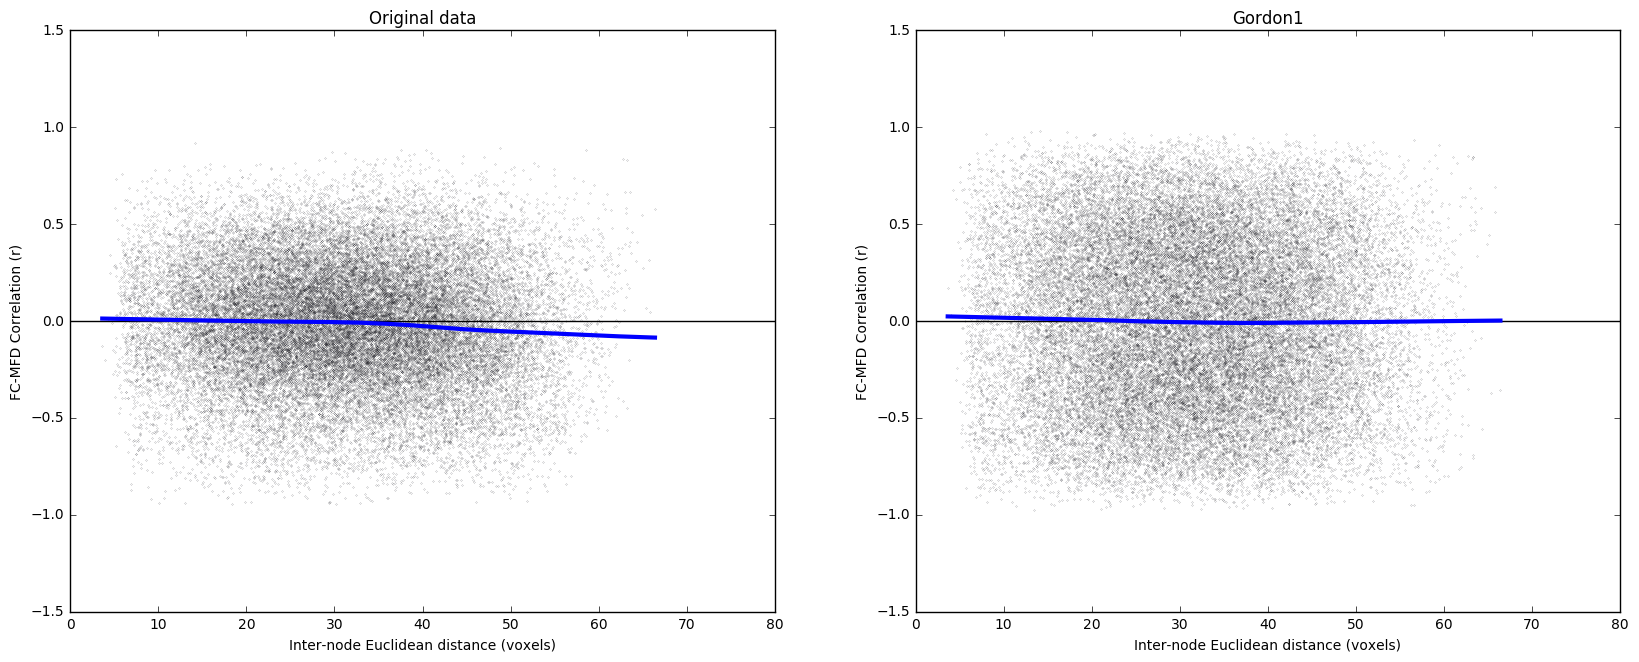

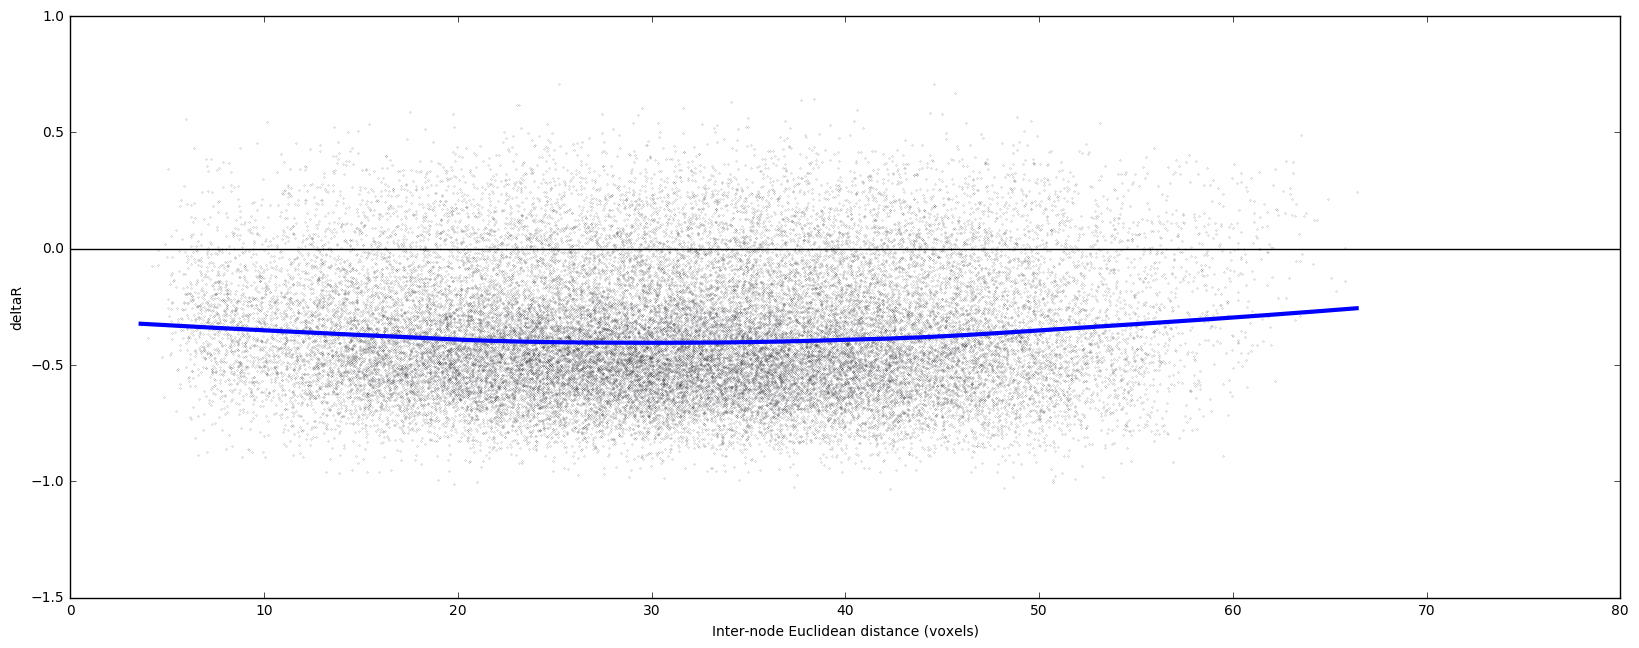

In [3]:
fdScores     = np.zeros((len(subjects)),dtype=np.float32)
fcMats       = np.zeros((config.nParcels,config.nParcels,len(subjects)),dtype=np.float32)
fcMats_dn    = np.zeros((config.nParcels,config.nParcels,len(subjects)),dtype=np.float32)
config.queue = False
iSub= 0
for config.subject in subjects:
    print 'SUB {}/{}: {}'.format(iSub+1,len(subjects),config.subject)
    runPipelinePar(launchSubproc=False)
    fcMats[:,:,iSub],fcMats_dn[:,:,iSub] = plotFC(displayPlot=False)
    fdScores[iSub]=np.mean(computeFD())
    iSub = iSub + 1

# rsFC/mean FD plot
# since this is a correlation across subjects, it makes most sense if we have enough subjects
plotQCrsFC(fcMats,fcMats_dn,fdScores)
    
# deltaR plot
plotDeltaR(fcMats,fcMats_dn)